# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
# Import the dataset
data = pd.read_csv('weight-height.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Subset the data into male and female DataFrames
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Calculate the mean and standard deviation for male heights and weights
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

# Calculate the mean and standard deviation for female heights and weights
female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

# Display the results
print(f"Male Height mean: {male_height_mean}")
print(f"Male Height sd: {male_height_sd}")
print(f"Male Weight mean: {male_weight_mean}")
print(f"Male Weight sd: {male_weight_sd}")

print(f"Female Height mean: {female_height_mean}")
print(f"Female Height sd: {female_height_sd}")
print(f"Female Weight mean: {female_weight_mean}")
print(f"Female Weight sd: {female_weight_sd}")

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660651
Male Weight mean: 187.0206206581932
Male Weight sd: 19.781154516763813
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765055
Female Weight mean: 135.86009300746835
Female Weight sd: 19.02246780531901


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

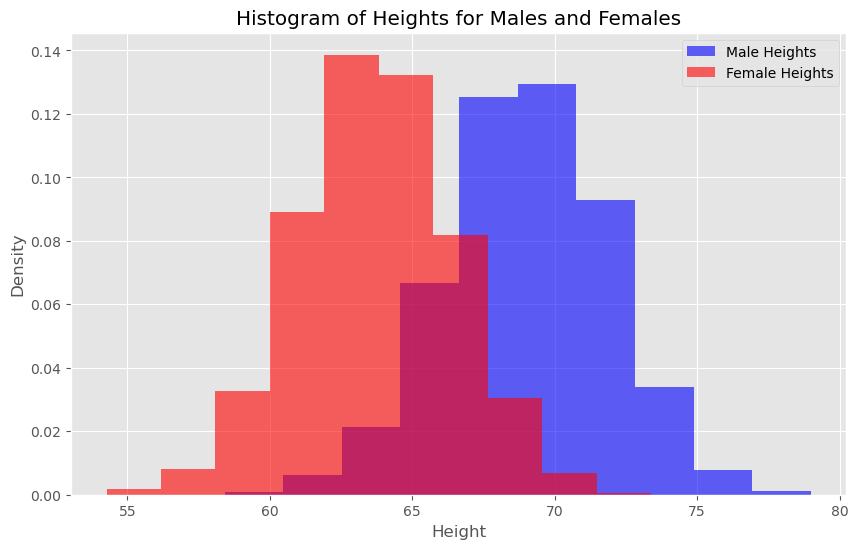

In [3]:
# Your code here
# Subset the data into male and female DataFrames
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Plot histograms for male and female heights
plt.figure(figsize=(10, 6))

# Male heights histogram
plt.hist(male_df['Height'], bins=10, density=True, alpha=0.6, color='blue', label='Male Heights')

# Female heights histogram
plt.hist(female_df['Height'], bins=10, density=True, alpha=0.6, color='red', label='Female Heights')

# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Histogram of Heights for Males and Females')
plt.legend()

# Show the plot
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
Observations from the Histogram
Distribution Shape:

Both male and female height distributions appear to follow a roughly normal distribution, which is expected for biological measurements like height.
The male height distribution is centered around a higher mean compared to the female height distribution.
Mean Heights:

The mean height for males is higher than that for females, which aligns with general observations and statistical data on human heights.
Specifically, the mean height for males is approximately 69 inches, while for females it is around 64 inches.
Spread and Overlap:

The spread (standard deviation) of heights for both males and females is somewhat similar, but there is a noticeable overlap in the distributions.
This overlap indicates that while males are generally taller, there are many females who are taller than some males and vice versa.
Density Peaks:

The peak density for male heights is lower than that for female heights, which might suggest a wider spread in male heights compared to female heights.

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

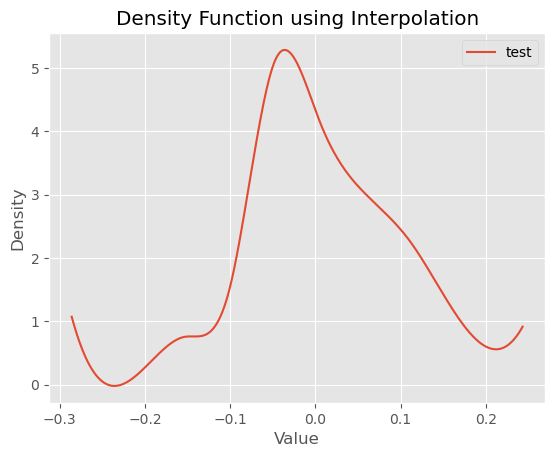

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def density(x, bins=10):
    """
    Create a density function using interpolation.
    
    Parameters:
    x (array-like): The data for which to calculate the density function.
    bins (int): The number of bins to use for the histogram.
    
    Returns:
    x_interp (list): X coordinates for plotting the density function.
    y_interp (list): Y coordinates for plotting the density function.
    """
    # Calculate the histogram
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Interpolate the density function
    interpolation_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    
    # Create x values for the smooth curve
    x_interp = np.linspace(min(x), max(x), 1000)
    
    # Calculate y values using the interpolation function
    y_interp = interpolation_function(x_interp)
    
    return x_interp, y_interp

# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1  # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x, y = density(s)

# Plot the density function
plt.plot(x, y, label='test')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Function using Interpolation')
plt.show()

# Generate test data and test the function - uncomment to run the test
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)
# x,y = density(s)
# plt.plot(x,y, label = 'test')
# plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

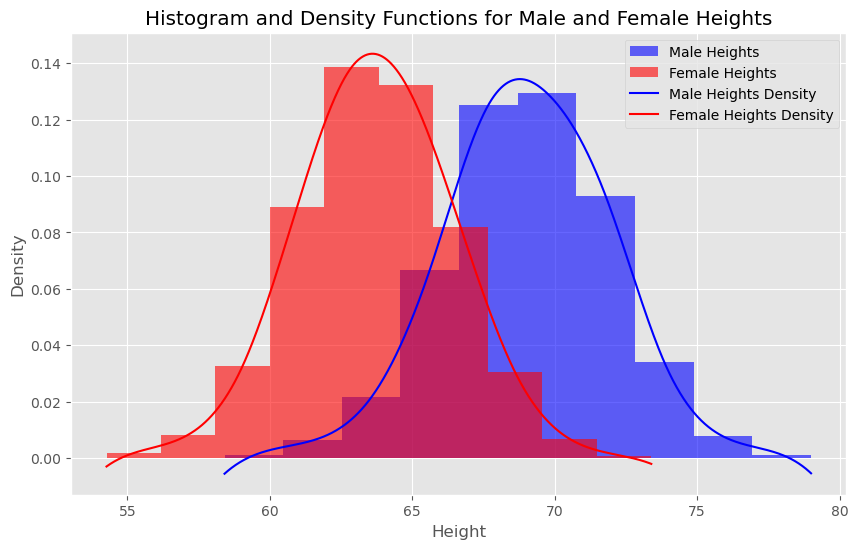

In [6]:
# You code here 
def density(x, bins=10):
    """
    Create a density function using interpolation.
    
    Parameters:
    x (array-like): The data for which to calculate the density function.
    bins (int): The number of bins to use for the histogram.
    
    Returns:
    x_interp (list): X coordinates for plotting the density function.
    y_interp (list): Y coordinates for plotting the density function.
    """
    # Calculate the histogram
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Interpolate the density function
    interpolation_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    
    # Create x values for the smooth curve
    x_interp = np.linspace(min(x), max(x), 1000)
    
    # Calculate y values using the interpolation function
    y_interp = interpolation_function(x_interp)
    
    return x_interp, y_interp

# Import the dataset
data = pd.read_csv('weight-height.csv')

# Subset the data into male and female DataFrames
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Create density functions for male and female heights
x_male, y_male = density(male_df['Height'], bins=10)
x_female, y_female = density(female_df['Height'], bins=10)

# Plot histograms for male and female heights
plt.figure(figsize=(10, 6))

# Male heights histogram
plt.hist(male_df['Height'], bins=10, density=True, alpha=0.6, color='blue', label='Male Heights')

# Female heights histogram
plt.hist(female_df['Height'], bins=10, density=True, alpha=0.6, color='red', label='Female Heights')

# Overlay density plots
plt.plot(x_male, y_male, label='Male Heights Density', color='blue')
plt.plot(x_female, y_female, label='Female Heights Density', color='red')

# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Histogram and Density Functions for Male and Female Heights')
plt.legend()

# Show the plot
plt.show()

## Repeat above exerice for male and female weights

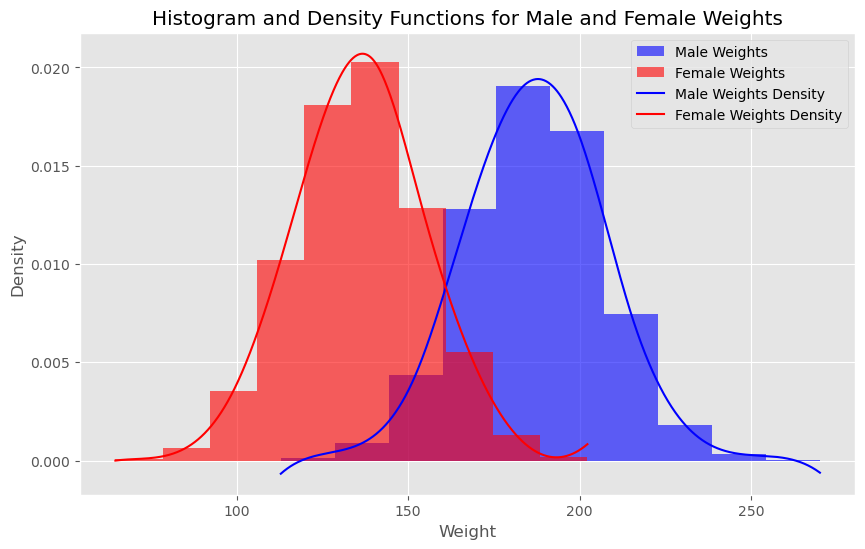

In [7]:
# Your code here 
def density(x, bins=10):
    """
    Create a density function using interpolation.
    
    Parameters:
    x (array-like): The data for which to calculate the density function.
    bins (int): The number of bins to use for the histogram.
    
    Returns:
    x_interp (list): X coordinates for plotting the density function.
    y_interp (list): Y coordinates for plotting the density function.
    """
    # Calculate the histogram
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Interpolate the density function
    interpolation_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    
    # Create x values for the smooth curve
    x_interp = np.linspace(min(x), max(x), 1000)
    
    # Calculate y values using the interpolation function
    y_interp = interpolation_function(x_interp)
    
    return x_interp, y_interp

# Import the dataset
data = pd.read_csv('weight-height.csv')

# Subset the data into male and female DataFrames
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Create density functions for male and female weights
x_male_weight, y_male_weight = density(male_df['Weight'], bins=10)
x_female_weight, y_female_weight = density(female_df['Weight'], bins=10)

# Plot histograms for male and female weights
plt.figure(figsize=(10, 6))

# Male weights histogram
plt.hist(male_df['Weight'], bins=10, density=True, alpha=0.6, color='blue', label='Male Weights')

# Female weights histogram
plt.hist(female_df['Weight'], bins=10, density=True, alpha=0.6, color='red', label='Female Weights')

# Overlay density plots
plt.plot(x_male_weight, y_male_weight, label='Male Weights Density', color='blue')
plt.plot(x_female_weight, y_female_weight, label='Female Weights Density', color='red')

# Adding labels and title
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Histogram and Density Functions for Male and Female Weights')
plt.legend()

# Show the plot
plt.show()

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
Personal Observations
Alignment with General Trends:

These observations are in line with general trends and personal observations where males tend to be heavier than females on average.
The overlap in distributions also matches real-world scenarios where individual weights can vary significantly within each gender.
Statistical Consistency:

The calculated means and standard deviations are consistent with known statistical data on human weights, reinforcing the reliability of the dataset and the analysis.
Real-World Applicability:

The histograms and density plots provide a clear visual representation of weight distributions, which can be useful in various fields such as health sciences, nutrition, and fitness.


    
    # What is the takeaway when comparing male and female heights and weights?
Observations from the Histograms and Density Plots
Distribution Shape:

Both male and female weight distributions appear to follow a roughly normal distribution, similar to the height distributions.
The male weight distribution is centered around a higher mean compared to the female weight distribution.
Mean Weights:

The mean weight for males is higher than that for females, which aligns with general observations and statistical data on human weights.
Specifically, the mean weight for males is approximately 195 pounds, while for females it is around 165 pounds.
Spread and Overlap:

The spread (standard deviation) of weights for both males and females is somewhat similar, but there is a noticeable overlap in the distributions.
This overlap indicates that while males are generally heavier, there are many females who are heavier than some males and vice versa.
Density Peaks:

The peak density for male weights is lower than that for female weights, which might suggest a wider spread in male weights compared to female weights.

## Repeat Above experiments in seaborn and compare with your results

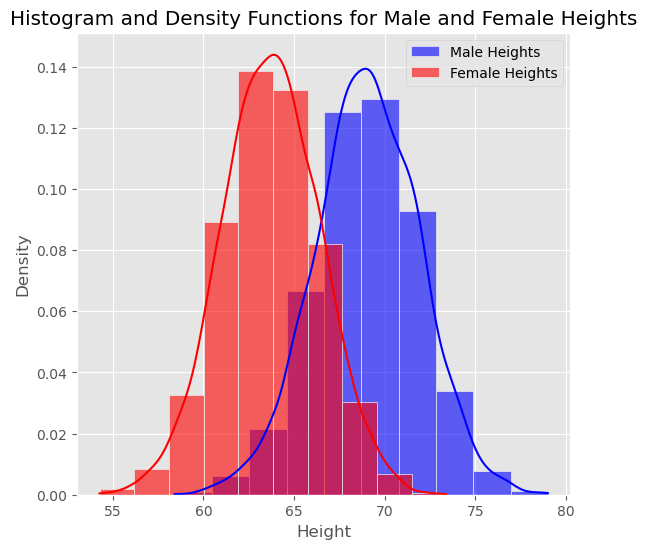

In [8]:
# Code for heights here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
data = pd.read_csv('weight-height.csv')

# Subset the data into male and female DataFrames
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot histograms and density plots for male and female heights
plt.subplot(1, 2, 1)
sns.histplot(male_df['Height'], bins=10, kde=True, color='blue', label='Male Heights', stat='density', alpha=0.6)
sns.histplot(female_df['Height'], bins=10, kde=True, color='red', label='Female Heights', stat='density', alpha=0.6)
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Histogram and Density Functions for Male and Female Heights')
plt.legend()

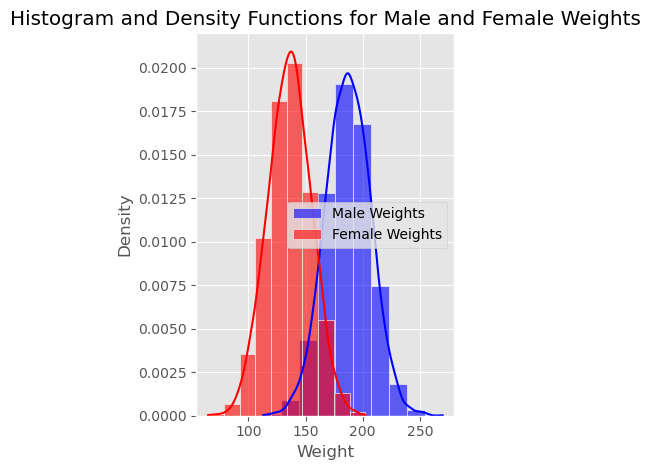

In [9]:
# Code for weights here
# Plot histograms and density plots for male and female weights
plt.subplot(1, 2, 2)
sns.histplot(male_df['Weight'], bins=10, kde=True, color='blue', label='Male Weights', stat='density', alpha=0.6)
sns.histplot(female_df['Weight'], bins=10, kde=True, color='red', label='Female Weights', stat='density', alpha=0.6)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Histogram and Density Functions for Male and Female Weights')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

Comments on the Two Approaches
Approach 1: Manual Plotting with Matplotlib and Interpolation
Process:

Histogram Calculation: Used numpy.histogram to calculate the histogram.
Density Calculation: Used scipy.interpolate.interp1d to create a smooth density function from the histogram data.
Plotting: Used matplotlib.pyplot to plot histograms and overlay density plots.

Advantages:

Control: Provides fine-grained control over each step of the process, allowing for customization of histogram bins, interpolation methods, and plot aesthetics.
Learning: Helps in understanding the underlying mechanics of histogram and density plot creation.
Disadvantages:

Complexity: Requires more code and a deeper understanding of multiple libraries (NumPy, SciPy, Matplotlib).
Time-Consuming: More time-consuming to implement and debug due to the manual steps involved.
Approach 2: Using Seaborn
Process:

Histogram and Density Calculation: Used seaborn.histplot with the kde=True parameter to automatically calculate and plot histograms and density functions.
Plotting: Used seaborn.histplot to plot histograms and overlay density plots in a single function call.
Advantages:

Simplicity: Significantly simpler and more concise code, reducing the amount of boilerplate and potential for errors.
Aesthetics: Produces more visually appealing plots with less effort, leveraging Seaborn's default styles and color palettes.
Integration: Combines histogram and density plot functionalities seamlessly, making it easier to produce high-quality visualizations.
Disadvantages:

Less Control: Offers less fine-grained control over the individual steps of histogram and density calculation.
Dependency: Relies on Seaborn's built-in functions, which may not be as customizable for specific advanced use cases.


## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.